In [1]:
import os 
import requests

In [2]:
pdf_path = "world_geo.pdf"
if not os.path.exists(pdf_path):
    print('[INFO] The file does not exist, Downloading...')
    url  = "https://www.iipa.org.in/upload/world_geo.pdf"
    filename = pdf_path 
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as file:
            file.write(response.content)
            print(f"[INFO] The file has been downloaded as  {filename}")
    else:
        print(f"[INFO] Failed to download the file. Status Code: {response.status_code}")
else:
    print("[INFO] File {pdf_path} already exists.")

[INFO] File {pdf_path} already exists.


PREPROCESS 

In [3]:
import fitz 
from tqdm.auto import tqdm 

def text_formatter(text: str) -> str:
    cleaned_text = text.replace("\n", "").strip()
    return cleaned_text 

def o_r_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_text = []
    for page_number, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text=text)
        pages_and_text.append({"page_number": page_number,
        "page_char_count" : len(text),
        "page_word_count" : len(text.split(" ")),
        "page_sentence_count" : len(text.split(". ")),
        "page_token_count" : len(text) / 4,
        "text": text}) # One token = 4 characters

    return pages_and_text

pages_and_text = o_r_pdf(pdf_path = pdf_path)
pages_and_text[:2]

0it [00:00, ?it/s]

[{'page_number': 0,
  'page_char_count': 80,
  'page_word_count': 20,
  'page_sentence_count': 1,
  'page_token_count': 20.0,
  'text': '1      IIPA2022  22 World Geography  Short Answers PKP-03 by Dr Amit Kumar Singh'},
 {'page_number': 1,
  'page_char_count': 4596,
  'page_word_count': 163,
  'page_sentence_count': 43,
  'page_token_count': 1149.0,
  'text': '2  Contents 1.  Origin of Solar System and Sun ........................................................................................................... 6 2. Stars, Sun & Planets ............................................................................................................................. 8 Sun Statistics ....................................................................................................................................... 8 Solar Eclipse ........................................................................................................................................ 9 Lunar Eclipse .......

In [4]:
import random 

random.sample(pages_and_text, k=3)

[{'page_number': 99,
  'page_char_count': 671,
  'page_word_count': 119,
  'page_sentence_count': 6,
  'page_token_count': 167.75,
  'text': '100  Factors influencing Insolation \uf0b7 The amount of insolation received on the earth’s surface is not uniform everywhere. It varies according to the place and time. When the tropical regions receive maximum annual insolation, it gradually decreases towards the poles. Insolation is more in summers and less in winters. The major factors which influence the amount of insolation received are: o Rotation of the earth on its axis o The angle of incidence of the sun’s rays o Duration of the day o Transparency of the atmosphere 1. Rotation of the earth on its axis \uf0b7 The earth rotates on its own axis which makes an angle of 66.5 with the plane of its orbit around the sun.'},
 {'page_number': 42,
  'page_char_count': 2024,
  'page_word_count': 357,
  'page_sentence_count': 20,
  'page_token_count': 506.0,
  'text': '43  Incised or Entrenched Mean

In [5]:
import pandas as pd 

df = pd.DataFrame(pages_and_text)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,text
0,0,80,20,1,20.0,1 IIPA2022 22 World Geography Short Ans...
1,1,4596,163,43,1149.0,2 Contents 1. Origin of Solar System and Sun...
2,2,4448,208,40,1112.0,3 Types of Volcanoes ...........................
3,3,4560,203,44,1140.0,4 Continental Slope ............................
4,4,3474,178,31,868.5,5 Insolation or Incoming Solar Radiation .......


In [6]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count
count,129.00,129.00,129.00,129.00,129.00
mean,64.00,1655.45,262.89,16.95,413.86
std,37.38,732.36,96.85,7.75,183.09
min,0.00,80.00,20.00,1.00,20.00
25%,32.00,1146.00,189.00,12.00,286.50
50%,64.00,1699.00,264.00,16.00,424.75
75%,96.00,2055.00,341.00,21.00,513.75
max,128.00,4596.00,424.00,44.00,1149.00


In [7]:
from spacy.lang.en import English

nlp = English()
#Adding a sentencizer pipeline
nlp.add_pipe("sentencizer")

#Creating a documnet instance as an example

doc = nlp("I am a shitty person. I am a good man. I am ugly.")
assert len(list(doc.sents)) == 3

list(doc.sents)


[I am a shitty person., I am a good man., I am ugly.]

In [8]:
pages_and_text[0]

{'page_number': 0,
 'page_char_count': 80,
 'page_word_count': 20,
 'page_sentence_count': 1,
 'page_token_count': 20.0,
 'text': '1      IIPA2022  22 World Geography  Short Answers PKP-03 by Dr Amit Kumar Singh'}

In [9]:
for item in tqdm(pages_and_text):
    item["sentences"] = list(nlp(item["text"]).sents)

    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    item["page_sentence_count_spacy"] = len(item["sentences"])


  0%|          | 0/129 [00:00<?, ?it/s]

In [10]:
random.sample(pages_and_text, k=1)

[{'page_number': 81,
  'page_char_count': 1790,
  'page_word_count': 337,
  'page_sentence_count': 23,
  'page_token_count': 447.5,
  'text': '82  \uf0b7 Note: The water movements which are caused by the meteorological effects like the said above are called as surges and they are not regular like tides. \uf0b7 The moon’s gravitational pull to a great extent is the major cause of the occurrence of tides (the moon’s gravitational attraction is more effective on the earth than that of the sun). \uf0b7 Sun’s gravitational pull and the centrifugal force due to the rotation of earth are the other forces which act along with the moon’s gravitational pull. \uf0b7 The highest tides in the world occur in the Bay of Fundi in Canada. \uf0b7 When the tide is channeled between islands or into bays and estuaries, they are termed as Tidal Currents. \uf0b7 The regular interval between two high or two low tides is 12 hours 25 minutes. Flow Tide and Ebb Tide A flow tide or a flood tide is a rising tide o

In [11]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,page_sentence_count_spacy
count,129.00,129.00,129.00,129.00,129.00,129.00
mean,64.00,1655.45,262.89,16.95,413.86,15.51
std,37.38,732.36,96.85,7.75,183.09,6.25
min,0.00,80.00,20.00,1.00,20.00,1.00
25%,32.00,1146.00,189.00,12.00,286.50,10.00
50%,64.00,1699.00,264.00,16.00,424.75,16.00
75%,96.00,2055.00,341.00,21.00,513.75,20.00
max,128.00,4596.00,424.00,44.00,1149.00,31.00


CHUNKING : Splitting sentecnces in groups of 10 or less

In [12]:
num_sentence_chunk_size = 10 
def split_list(input_list: list, slice_size: int = num_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0, len(input_list), slice_size)]

text_list = list(range(70))
split_list(text_list)


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 61, 62, 63, 64, 65, 66, 67, 68, 69]]

In [13]:
for item in tqdm(pages_and_text):
    item["sentence_chunks"] = split_list(input_list=item["sentences"], slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/129 [00:00<?, ?it/s]

In [14]:
random.sample(pages_and_text, k = 1)

[{'page_number': 26,
  'page_char_count': 1110,
  'page_word_count': 189,
  'page_sentence_count': 12,
  'page_token_count': 277.5,
  'text': '27  asthenosphere is the main source of magma and it is the layer over which the lithospheric plates/ continental plates move (plate tectonics).  The discontinuity between the upper mantle and the lower mantle is known as Repetti Discontinuity. The portion of the mantle which is just below the lithosphere and asthenosphere, but above the core is called as Mesosphere. Core It is the innermost layer surrounding the earth’s centre. The core is separated from the mantle by Guttenberg’s Discontinuity. It is composed mainly of iron (Fe) and nickel (Ni) and hence it is also called as NIFE. The core constitutes nearly 15% of earth’s volume and 32.5% of earth’s mass. The core is the densest layer of the earth with its density ranges between 9.5-14.5g/cm3. The Core consists of two sub-layers: the inner core and the outer core. The inner core is in solid s

In [15]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,page_sentence_count_spacy,num_chunks
count,129.00,129.00,129.00,129.00,129.00,129.00,129.00
mean,64.00,1655.45,262.89,16.95,413.86,15.51,1.97
std,37.38,732.36,96.85,7.75,183.09,6.25,0.71
min,0.00,80.00,20.00,1.00,20.00,1.00,1.00
25%,32.00,1146.00,189.00,12.00,286.50,10.00,1.00
50%,64.00,1699.00,264.00,16.00,424.75,16.00,2.00
75%,96.00,2055.00,341.00,21.00,513.75,20.00,2.00
max,128.00,4596.00,424.00,44.00,1149.00,31.00,4.00


In [16]:
import re 

pages_and_chunks = []
for item in tqdm(pages_and_text):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        # join the sentences together into paragraph like structure aka join the list of sentences into one paragraph 

        joined_sentence_chunk = "".join(sentence_chunk).replace("  "," ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)

        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/129 [00:00<?, ?it/s]

254

In [17]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 41,
  'sentence_chunk': 'Erosion, transportation, and deposition continue until the slopes are almost completely flattened leaving finally a lowland of faint relief called peneplains with some low resistant remnants called monadnocks. Erosional Landforms due to Running Water Valleys, Gorges, Canyon As we discussed above, valleys are formed as a result of running water. The rills which are formed by the overland flow of water later develop into gullies. These gullies gradually deepen and widen to form valleys. A gorge is a deep valley with very steep to straight sides. A canyon is characterized by steep step-like side slopes and may be as deep as a gorge. A gorge is almost equal in width at its top as well as bottom and is formed in hard rocks while a canyon is wider at its top than at its bottom and is formed in horizontal bedded sedimentary rocks. Potholes, Plunge pools Potholes are more or less circular depressions over the rocky beds of hills streams. Once a small a

In [18]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,254.00,254.00,254.00,254.00
mean,62.39,838.00,131.24,209.50
std,37.55,527.47,60.81,131.87
min,0.00,5.00,1.00,1.25
25%,29.25,600.50,95.25,150.12
50%,61.00,832.50,137.50,208.12
75%,94.00,1050.25,174.00,262.56
max,128.00,4446.00,321.00,1111.50


In [19]:
min_token_length = 15
for index, row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    # Example processing code
    print(f"Processing row {index}: {row.to_dict()}")

Processing row 17: {'page_number': 8, 'sentence_chunk': 'The earth is the only planet where some special', 'chunk_char_count': 47, 'chunk_word_count': 9, 'chunk_token_count': 11.75}
Processing row 173: {'page_number': 85, 'sentence_chunk': 'It is the layer of the ocean', 'chunk_char_count': 28, 'chunk_word_count': 7, 'chunk_token_count': 7.0}
Processing row 145: {'page_number': 70, 'sentence_chunk': 'wide.', 'chunk_char_count': 5, 'chunk_word_count': 1, 'chunk_token_count': 1.25}
Processing row 188: {'page_number': 93, 'sentence_chunk': 'It is largely responsible', 'chunk_char_count': 25, 'chunk_word_count': 4, 'chunk_token_count': 6.25}
Processing row 117: {'page_number': 56, 'sentence_chunk': 'The deepest section is less than 55m (180 feet) underwater.', 'chunk_char_count': 59, 'chunk_word_count': 10, 'chunk_token_count': 14.75}


In [20]:
pages_and_chunks_over_min_token_length = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_length[:2]

[{'page_number': 0,
  'sentence_chunk': '1   IIPA2022 22 World Geography Short Answers PKP-03 by Dr Amit Kumar Singh',
  'chunk_char_count': 75,
  'chunk_word_count': 15,
  'chunk_token_count': 18.75},
 {'page_number': 1,
  'sentence_chunk': '2 Contents 1. Origin of Solar System and Sun ........................................................................................................... 6 2. Stars, Sun & Planets ............................................................................................................................. 8 Sun Statistics ....................................................................................................................................... 8 Solar Eclipse ........................................................................................................................................ 9 Lunar Eclipse ..................................................................................................................................

In [21]:
random.sample(pages_and_chunks_over_min_token_length, k=1)

[{'page_number': 3,
  'sentence_chunk': 'Ocean thermal energy conversion (OTEC) ........................................................................................ 91 25. Composition and Structure of Atmosphere ...................................................................................... 94 Composition ...................................................................................................................................... 94 Layers of Earth Atmoshpheres ........................................................................................................... 96 26. Insolation and Heat Balance of the Earth ......................................................................................... 99',
  'chunk_char_count': 692,
  'chunk_word_count': 34,
  'chunk_token_count': 173.0}]

Embedding : 

A useful numerical representation and it is a learned representation. 


{
    the: 0,
    a : 1,
    ...
}

In [22]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-MiniLM-L6-v2", device="cuda")

#create a list of sentences
sentences = ["The sentence transformer provides an easier way to create embeddings",
"Sentences can be embedded one by one in  a list.","I like chimps!"]

embeddings = embedding_model.encode(sentences)
embedding_dict = dict(zip(sentences, embeddings))

for sentence, embedding in embedding_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embedding}")


comet_ml is installed but `COMET_API_KEY` is not set.


C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Sentence: The sentence transformer provides an easier way to create embeddings
Embedding: [-6.87679201e-02 -3.37028950e-02  3.68130989e-02  1.77186299e-02
  4.59097028e-02  7.25906417e-02 -2.06882395e-02  5.50199710e-02
  9.44427997e-02 -4.44253236e-02  5.07963374e-02  1.03461444e-02
  1.73806529e-02  6.51760772e-02  1.94573663e-02  8.53721723e-02
  1.59757342e-02  1.02003135e-01 -7.83813596e-02 -1.06738113e-01
  6.44138968e-03  3.28693874e-02  2.74742004e-02 -6.96152002e-02
  5.03769144e-02  6.34706244e-02 -3.52961123e-02  1.27846748e-02
  7.83551186e-02 -6.58562314e-03 -1.30270229e-04 -5.40848039e-02
 -4.96062152e-02  9.75598395e-02 -3.67665216e-02  2.29739249e-02
  4.46881577e-02  7.04804584e-02 -4.62974198e-02 -1.74799338e-02
  2.25367267e-02  6.00746088e-03  6.89678416e-02  5.03606573e-02
  4.12279367e-02 -3.38686816e-02 -4.16970365e-02 -9.08160862e-03
 -2.03304663e-02  1.73994489e-02 -4.90085185e-02 -2.83182859e-02
 -9.14116317e-05  6.86822906e-02 -4.36346792e-02  3.69178839e-02


In [23]:
embeddings[0].shape

(384,)

In [24]:
embedding = embedding_model.encode("My favourite animal is the donkey")
embedding

array([-5.49600944e-02,  7.83105660e-03,  4.53742221e-02,  1.39820976e-02,
        6.11190312e-03,  3.69757041e-02,  5.68162575e-02,  8.16690922e-03,
        6.46038875e-02,  3.74894068e-02, -3.10413763e-02, -6.54169694e-02,
        1.80261582e-02,  6.76760450e-02,  4.60805856e-02, -7.25531066e-03,
        2.34833471e-02, -2.68905889e-02,  1.29957236e-02, -7.20567480e-02,
       -9.44685787e-02,  5.52156903e-02,  1.91131514e-02, -3.16299610e-02,
       -1.05778761e-01, -7.45278820e-02,  8.34870897e-03,  2.31317915e-02,
       -3.54249147e-04, -7.11231530e-02, -5.96878007e-02, -5.54633066e-02,
        5.56221940e-02, -1.30626876e-02, -3.61372605e-02,  3.70618515e-02,
        2.22166744e-03, -6.46472052e-02,  8.49302113e-02,  5.51789813e-02,
        2.26267688e-02,  1.08027216e-02,  5.81755601e-02, -3.67338434e-02,
        4.32512118e-03,  3.97136435e-02, -4.81586643e-02, -4.30390388e-02,
        8.91654491e-02,  2.15335749e-02,  1.61640681e-02, -1.13695599e-02,
       -2.48992108e-02, -

In [25]:
%%time 

embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_length):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])



  0%|          | 0/249 [00:00<?, ?it/s]

CPU times: total: 922 ms
Wall time: 1.28 s


In [26]:
%%time 

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_length]
text_chunks[100]

CPU times: total: 0 ns
Wall time: 0 ns


'Deflation Hollows Deflation is the removal of loose particles from the ground by the action of wind. When deflation causes a shallow depression by persistent movements of wind, they are called as deflation hollows. Mushroom Tables Ventifacts are rocks that have been abraded, pitted, etched, grooved, or polished by wind-driven sand or ice crystals. These geomorphic features are most typically found in arid environments where there is little vegetation to interfere with aeolian particle transport, where there are frequently strong winds, and where there is a steady but not overwhelming supply of sand. Mushroom Tables / Mushroom rocks are Ventifacts in the shape of a mushroom. In deserts, a greater amount of sand and rock particles are transported close to the ground by the winds which cause more bottom erosion in overlying rocks than the top. This'

In [27]:
len(text_chunks)

249

In [28]:
%%time 

text_chunk_embeddings = embedding_model.encode(text_chunks, batch_size=32, convert_to_tensor=True)
text_chunk_embeddings

CPU times: total: 250 ms
Wall time: 310 ms


tensor([[ 0.0561,  0.0737,  0.0419,  ..., -0.0218, -0.1246,  0.0038],
        [-0.0754,  0.0494, -0.0252,  ...,  0.0150, -0.0143,  0.0286],
        [ 0.0264, -0.0255,  0.0595,  ..., -0.0240, -0.0227, -0.0092],
        ...,
        [-0.0200,  0.0131,  0.1068,  ..., -0.0089,  0.0557, -0.0017],
        [-0.0557,  0.0520,  0.1518,  ..., -0.0607, -0.0696, -0.0524],
        [-0.0396,  0.0280,  0.1182,  ..., -0.0675, -0.1298, -0.0064]],
       device='cuda:0')

In [29]:
## Saving embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_length)
embeddings_df_save_path = " text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [30]:
## viewing the saved file

text_chunks_and_embeddings_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embeddings_df_load.head()


,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,1 IIPA2022 22 World Geography Short Answers ...,75,15,18.75,[ 5.60791939e-02 7.36621842e-02 4.18552086e-...
1,1,2 Contents 1. Origin of Solar System and Sun ....,3711,128,927.75,[-7.53976032e-02 4.93803062e-02 -2.51827892e-...
2,1,"Temperature, Pressure and Density of the Earth...",879,30,219.75,[ 2.63881050e-02 -2.54815072e-02 5.94870374e-...
3,2,3 Types of Volcanoes ............................,4446,206,1111.50,[ 7.03721046e-02 -3.47200967e-02 5.47501445e-...
4,3,4 Continental Slope .............................,3865,167,966.25,[ 1.10680657e-02 4.12390829e-04 -1.85156371e-...


RAG : Search and Answer :: 

Retrieve relevant passages based on Query and use those passages to augment an input to an LLM so it can generate an output based on those relevant passages.

In [31]:
 #Simimlarity Search 
import torch 
import numpy as np 
device = "cuda" if torch.cuda.is_available() else "cpu"
import pandas as pd

text_chunks_and_embeddings_df_load["embedding"] = text_chunks_and_embeddings_df_load["embedding"].apply(lambda x: np.array([float(i) for i in str(x).strip("[]").split()]))

embeddings = torch.tensor(np.stack(text_chunks_and_embeddings_df_load["embedding"].tolist(), axis=0), dtype=torch.float32).to(device)

pages_and_chunks =  text_chunks_and_embeddings_df_load.to_dict(orient="records")

text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,1 IIPA2022 22 World Geography Short Answers ...,75,15,18.75,"[0.0560791939, 0.0736621842, 0.0418552086, 0.0..."
1,1,2 Contents 1. Origin of Solar System and Sun ....,3711,128,927.75,"[-0.0753976032, 0.0493803062, -0.0251827892, 0..."
2,1,"Temperature, Pressure and Density of the Earth...",879,30,219.75,"[0.026388105, -0.0254815072, 0.0594870374, 0.0..."
3,2,3 Types of Volcanoes ............................,4446,206,1111.50,"[0.0703721046, -0.0347200967, 0.0547501445, -0..."
4,3,4 Continental Slope .............................,3865,167,966.25,"[0.0110680657, 0.000412390829, -0.0185156371, ..."


In [32]:
embeddings.shape

#259 embeddings all of size 384

torch.Size([249, 384])

In [33]:
from sentence_transformers import util, SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-MiniLM-L6-v2", device=device)


C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


SEMANTIC SEARCH PIPELINE

1. Defining a Query String
2. Turn the query into an embedding. 
3. Perform a dot product or cosine simmilarity function between the text embeddings and the query embedding. 
4. Sort the results from 3 in descending order.

In [34]:
# Defining the Query String 

query = "magma"
print(f"query: {query}")

# turning the query into an embedding using the same model

query_embedding = embedding_model.encode(query, convert_to_tensor=True).to("cuda")

# getting simmilarity scores using the dot product 


dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
results_dot_product = torch.topk(dot_scores, k=5)
results_dot_product

query: magma


torch.return_types.topk(
values=tensor([0.4164, 0.3998, 0.3970, 0.3786, 0.3774], device='cuda:0'),
indices=tensor([ 66,  55,  64, 176,   3], device='cuda:0'))

In [35]:
#checking for working 
pages_and_chunks[66]

{'page_number': 31,
 'sentence_chunk': 'They are characterized by the eruption of a cooler and more viscous lavas than basalt. These volcanoes often result in explosive eruptions. Along with lava, large quantities of pyroclastic materials and ashes find their way to the ground. This material accumulates in the vicinity of the vent openings and leading to the formation of layers, and this makes the mount appears as composite volcanoes. Caldera: These are the most explosive of the earth’s volcanoes. They are usually so explosive that when they erupt they tend to collapse on themselves rather than building any tall structure. The collapsed depressions are called calderas. Their explosiveness indicates that its magma chamber is large and in close vicinity. A caldera differs from a crater in such a way that a caldera is a huge depression caused by a collapse',
 'chunk_char_count': 825,
 'chunk_word_count': 135,
 'chunk_token_count': 206.25,
 'embedding': array([ 1.15415128e-02,  5.53071732e

In [ ]:
## for larger Embeddings 

larger_embeddings = torch.randln(100*embeddings.shape[0], 384).to(device)
print(f"Larger Embeddings: {larger_embeddings.shape}")


In [54]:
import textwrap

def print_wrapped(text, wrap_length=80):
        wrapped_text = textwrap.fill(text, wrap_length)
        print(wrapped_text)

In [55]:
print(f"Query : '{query}'\n")
print("Results:")

for score, idx in zip(results_dot_product[0], results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page Number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query : 'magma'

Results:
Score: 0.4164
Text:
They are characterized by the eruption of a cooler and more viscous lavas than
basalt. These volcanoes often result in explosive eruptions. Along with lava,
large quantities of pyroclastic materials and ashes find their way to the
ground. This material accumulates in the vicinity of the vent openings and
leading to the formation of layers, and this makes the mount appears as
composite volcanoes. Caldera: These are the most explosive of the earth’s
volcanoes. They are usually so explosive that when they erupt they tend to
collapse on themselves rather than building any tall structure. The collapsed
depressions are called calderas. Their explosiveness indicates that its magma
chamber is large and in close vicinity. A caldera differs from a crater in such
a way that a caldera is a huge depression caused by a collapse
Page Number: 31


Score: 0.3998
Text:
27 asthenosphere is the main source of magma and it is the layer over which the
lithospher

Automatically returning the page number for our related query and depiction of the most relevant page from the pdf

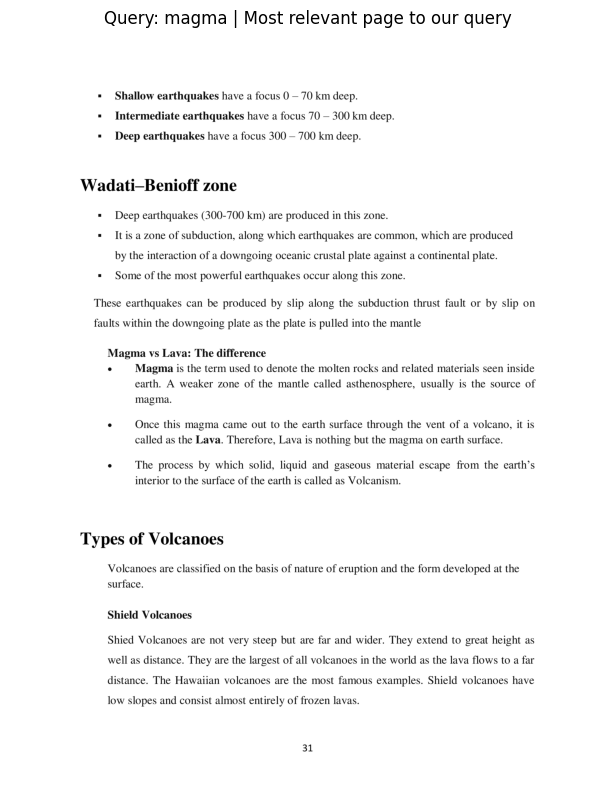

In [65]:
doc = fitz.open(pdf_path)
page = doc.load_page(30)
img = page.get_pixmap(dpi=300)
img.save("output_filename.png")
doc.close()

img_array = np.frombuffer(img.samples_mv, 
dtype=np.uint8).reshape(img.h, img.w, img.n)

import matplotlib.pyplot as plt 
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"Query: {query} | Most relevant page to our query")
plt.axis("off")
plt.show()

Cosine Simmilarity : Vectors that are aligned in the direction have a value close to 1. 
Vectors that are opposite in direction have a value close to -1

In [74]:
# def dot_product(vector1, vector2):
#     return torch.dot(vector1, vector2)

# def cosine_simm(vector1, vector2):
#     dot_prod = torch.dot(vector1, vector2)
#     norm_vect_1 = torch.sqrt(torch.sum(vector1**2))
#     norm_vect_2 = torch.sqrt(torch.sum(vector2**2))

#     return dot_prod/ (norm_vect_1*norm_vect_2)

# vector1 = torch.tensor([1,2,3,4], dtype=torch.float32)
# vector2 = torch.tensor([1,2,3,4], dtype=torch.float32)
# vector3 = torch.tensor([-1,-2,-3,-4], dtype=torch.float32)
# vector4 = torch.tensor([9,7,5,3], dtype=torch.float32)

# print(dot_product(vector1,vector2))
# print(dot_product(vector1,vector3))
# print(dot_product(vector1,vector4))



# print(cosine_simm(vector1,vector2))
# print(cosine_simm(vector1,vector3))
# print(cosine_simm(vector1,vector4))




tensor(30.)
tensor(-30.)
tensor(50.)
tensor(1.0000)
tensor(-1.0000)
tensor(0.7128)


In [85]:
from timeit import default_timer as timer

In [90]:
def retreive_relevant_resource(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
            #Embed query 
            query_embedding = model.encode(query, convert_to_tensor=True)
            start_time = timer()
            dot_scores = util.dot_score(query_embedding, embeddings)[0]
            end_time = timer()

            if print_time:
                print(f"[INFO] Time taken to get scores on: ({len(embeddings)} embeddings: {end_time-start_time:.5f}) seconds.")

            scores, indices = torch.topk(input=dot_scores, k = n_resources_to_return)

            return scores, indices

def print_top_results_and_scores(query: str, 
                embeddings: torch.tensor,
                pages_and_chunks: list[dict]=pages_and_chunks,
                n_resources_to_return: int=5):
                scores , indices = retreive_relevant_resource(query=query, embeddings=embeddings, n_resources_to_return=n_resources_to_return)


LLM : Local Generation

Goes from text input to text output.

In [92]:
# Get GPU available memory 

gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes/(2**30))
print(f"Avalailable : {gpu_memory_gb}")

Avalailable : 8
